# Praxisteil I: Bayessche Lineare Modelle

__Bayesian Workflow__

1. Problemstellung
2. Exploration der Daten
3. Bauen des Modells
4. Posterior Inference (Model Fitting)
5. Posterior Predictive Check
6. Parameter Inferenz
7. Modell verbessern

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import pymc3 as pm
import arviz as az
import numpy as np

import math
import warnings
warnings.filterwarnings('ignore')

kwargs_sampler = {'chains': 4,'cores': 4}

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
# Plotting functions
def plot_model_with_hdi(df,ppc,beta_0_est,beta_1_est):
    plt.figure(figsize=(16,8))
    az.plot_hdi(df['Price'], ppc['sales_pred'],color='gray',figsize=(16,8))
    plt.plot(df['Price'],df['Sales'],'.b')
    plt.plot(df['Price'], beta_0_est + beta_1_est*df['Price'],c='k')
    plt.xlabel('Price')
    plt.ylabel('Sales')

def plot_data(df,fit=False): 
    plt.figure(figsize=(16,8))
    if fit:
        coef = np.polyfit(df['Price'],df['Sales'],1)
        plt.plot(df['Price'],df['Sales'],'.b')
        plt.plot(df['Price'], coef[1] + coef[0]*df['Price'],c='k')
    else:
        plt.scatter(df['Price'],df['Sales'])
    plt.xlabel('Price', fontsize=20)
    plt.ylabel('Sales', fontsize=20)

## Problemstellung

Du wurdest beauftragt den Absatz des Unternehmens vorherzusagen.

Als erfahrener Bayesianer machst du dich ans Werk und überlegst dir, was den größten Einfluss auf den Absatz haben könnte. Nach deiner Recherche stellst du die Hypothese auf, dass der Preis wahrscheinlich den größten Einfluss hat und dieser negativ auf den Absatz wirkt. Diese Hypothese willst du mit einem ersten Modell überprüfen.

Die Daten hast du bereits gequeried.

## Exploration der Daten

In [4]:
# Load data
df = pd.read_csv('../data/dataset_sim.csv')
df.head()

,Sales,Price,Store
0,48.484536,5.749164,0
1,43.640838,4.796067,0
2,48.609230,4.817825,0
3,45.924189,5.680656,0
4,57.832635,3.181501,0


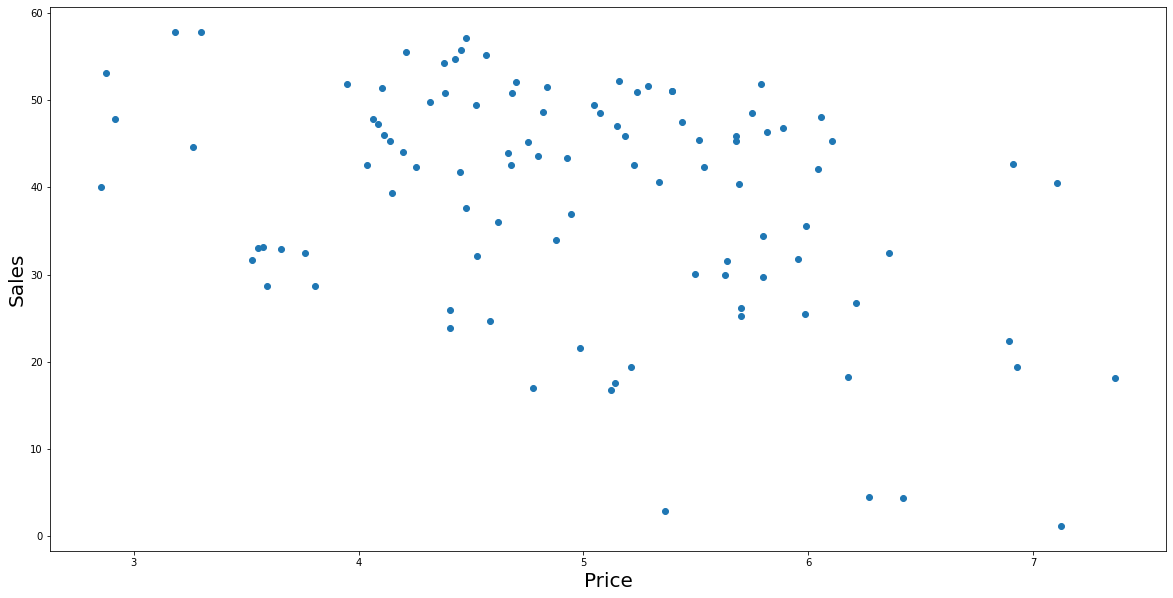

In [12]:
plot_data(df)

## Bauen des Modells

### Bayessches Lineares Modell

Du stellst das folgende probabilistische Modell auf, das den Absatz als bedingte Normalverteilung beschreibt:

$$
\begin{align}
y|X\beta &\sim N(\mu,\epsilon) \\
y &\sim N(X\beta,\epsilon)
\end{align}
$$

oder in diesem Falle konkret:

$$
s \sim N(\mu=\beta_0 + \beta_1 p,\epsilon)
$$

### Prior Distributions

Es gilt die Parameter $\beta_0$ und $\beta_1$ zu schätzen. In der Bayesschen Statistik werden ALLE Unbekannten mit einer Verteilung über ihre möglichen, plausiblen Werte beschrieben. Diese wird A-Priori-Verteilung genannt. 

In diesem Falle gilt es also Verteilungen für $\beta_0$, $\beta_1$ und $\epsilon$ zu finden. Eine Möglichkeit wäre:

$$
\begin{align}
\beta_0 &\sim N(\mu_{\beta_0}, \sigma_{\beta_0}) \\
\beta_1 &\sim N(\mu_{\beta_1}, \sigma_{\beta_1}) \\
\epsilon &\sim |N(0, \sigma_{\epsilon})| \\
\end{align}
$$

Wobei du bereits deine Annahme eines negativen Zusammenhangs in die Priors einbauen kannst, indem du $\mu_{\beta_1}<0$ setzt.

### Pymc3 implementierung

Dieses Modell wird in pymc3 wie folgt gebaut:

In [5]:
with pm.Model() as linear_model:


## Posterior Inference (Model Fitting)

### Sampling from the posterior

### Convergence Check

More information about MCMC sampling and convergence checks: https://docs.pymc.io/notebooks/Diagnosing_biased_Inference_with_Divergences.html

## Posterior Predictive Check

## Parameter Inference

### Posterior Distributions

### Exkurs: MLE / MAP Estimate

## Conclusion